# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

* Primeiro passo das análises é o _setup_ das _libs_ utilizadas

In [1]:
import pandas as pd
import numpy as np

* Aqui os dados de input são transformados em um dataframe chamado black_friday

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

* Com o head obtém-se o retorno das primeiras n linhas do dataframe aqui utilizado. Pode-se observar cada uma das colunas e que tipo de dados estamos tratando.

In [3]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

* Shape nos permite verificar quantas observações(conteúdo) contém nosso dataframe e em quantas colunas estão divididas essas observações;

In [4]:
def q1():
    return black_friday.shape
q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

* Deve-se verificiar quantos indivíduos únicos(User_ID) possuem a coluna Gender denotada como 'F' (female) **E** possuem a Age a faixa 26 e 35. Atenção pois esse valor deve ser um inteiro!

In [5]:
def q2():
    return int(black_friday[(black_friday['Gender'] == 'F') & (black_friday['Age'] == '26-35')]['User_ID'].count())
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

* Os valores únicos podem ser verificados através do User_ID

In [6]:
def q3():
    return black_friday['User_ID'].nunique()
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [7]:
def q4():
    return black_friday.dtypes.nunique()
q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

* black_friday.shape[0] : todos os registros
* black_friday.dropna().shape[0]: dataframe sem os valores nullos

    Logo, a relação entre todos os registros menos todos os registros do dataframe divididos por todos 
    os registros do dataframe nos retornam a porcentagem de registros nulos

In [8]:
def q5():
    return ((black_friday.shape[0])-(black_friday.dropna().shape[0]))/(black_friday.shape[0])
q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [9]:
def q6():
    return (int(black_friday.isna().sum().max()))
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

* .mode nos retorna o valor que aparece com mais frequência em um determinada variável. Ele desconsidera valores nulos.

In [10]:
def q7():
    return (int(black_friday['Product_Category_3'].mode()))
    
q7()

16

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

**Normalização:** tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1. Se a distribuição **não é Gaussiana** ou o **desvio padrão é muito pequeno**, normalizar os dados é uma escolha a ser tomada.

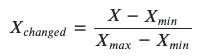

In [11]:
def q8():
    purchase_norm = black_friday['Purchase'] - black_friday['Purchase'].min()
    purchase_range = black_friday['Purchase'].max()-black_friday['Purchase'].min()
    return float(np.mean(purchase_norm)/(purchase_range))
q8()

0.3847939036269795

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

**Padronização:**  Resulta em uma média igual a 0 e um desvio padrão igual a 1. **Indicado** para distribuições **Gaussianas**. Segue a fórmula:

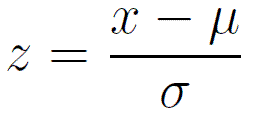

In [12]:
def q9():
    purchase_pad = (black_friday['Purchase'] - black_friday['Purchase'].mean()) / black_friday['Purchase'].std()
    return int(((purchase_pad >= -1) & (purchase_pad <= 1)).sum())
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

Basicamente verifica as colunas Product_Category_3 e Product_Category_2 possuem dados nu

In [13]:
def q10():
    # Retorne aqui o resultado da questão 10.
    product_category_2= list(black_friday[black_friday['Product_Category_2'].isna()].index)
    product_category_3= list(black_friday[black_friday['Product_Category_3'].isna()].index)
    return bool (np.isin(product_category_2,product_category_3).all())
q10()

True